# HW-5: Malware Classification

**Instructions:**

Suppose your company is struggling with a series of computer virus attacks for the past several months. The viruses were grouped into a few types with some effort. However, it takes a long time to sort out what kind of virus it is when been hit with. Thus, as a senior IT department member, you undertook a project to classify the virus as quickly as possible. You've been given a dataset of the features that may be handy (or not), and  also the associated virus type (target variable). 

You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc. To increase your grade you can add more elaboration such as using ensembling or exploiting feature selection/extraction techniques. **An evaluation rubric is provided.**

Please prepare a python notebook that describes the steps, present the results as well as your comments. 

You can download the data (csv file) [here](https://drive.google.com/file/d/1yxbibzUU8bjOyChDVFPfQ4viLduYdk29/view?usp=sharing).


Importing virus data.

Importing required libraries.

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('hw5_data.csv')

In [89]:
df.head

<bound method NDFrame.head of       Virtual  Offset     loc       Import  Imports     var     Forwarder  \
0         3.0     3.0   689.0    18.000000      6.0   890.0      6.000000   
1         3.0     3.0   583.0    15.000000      5.0  1574.0   8640.382774   
2         3.0     4.0  2796.0    15.000000      5.0   625.0      5.000000   
3         3.0     3.0   373.0  2726.071722      9.0   615.0      9.000000   
4         3.0     3.0    77.0    12.000000      4.0    66.0  91945.635853   
...       ...     ...     ...          ...      ...     ...           ...   
4994      4.0     4.0   118.0     0.000000      3.0     0.0      0.000000   
4995      3.0     3.0    27.0    12.000000      4.0    38.0      4.000000   
4996      3.0     3.0    16.0    12.000000      4.0     7.0      4.000000   
4997      4.0     4.0  2810.0     0.000000      2.0   666.0      0.000000   
4998      3.0     4.0  1587.0    21.000000      7.0   526.0      7.000000   

      UINT          LONG          BOOL  ...  

In [90]:
df.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2413.316145,2659.311487,4424.891220,2291.214822,2512.272757,3470.164710,2612.176503,2472.228927,2554.660865,2452.442360,...,14331.213118,9358.953517,23654.548237,8540.786955,17432.020184,22032.274639,9505.453675,70574.781259,54803.742148,4.086817
std,12506.374487,13159.966494,13604.624599,11996.827931,12656.467627,12442.838259,13026.935701,12695.076990,12533.327183,12280.398873,...,108685.996366,107161.612891,109735.456647,105281.088434,107423.247504,109858.578170,106876.987983,67871.038272,53395.251409,2.677785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-399471.378431,-344924.897141,-348906.065760,-379757.698729,-345576.170139,-410986.193796,-355679.953652,0.000000,0.000000,1.000000
25%,3.000000,3.000000,77.000000,6.000000,4.000000,37.000000,2.000000,6.000000,0.000000,13.000000,...,-57945.624535,-63567.620933,-50475.672159,-63194.878910,-55114.830841,-50016.264131,-63550.766114,13387.000000,8117.000000,2.000000
50%,3.000000,3.000000,526.000000,12.000000,4.000000,407.000000,4.000000,12.000000,5.000000,20.000000,...,13494.353190,9797.650967,22385.687582,10410.067259,18424.422329,21454.161075,9709.062906,67890.000000,49865.000000,3.000000
75%,4.000000,4.000000,1977.500000,18.000000,7.000000,1330.500000,6.000000,18.000000,9.000000,38.000000,...,87246.586847,82454.969088,95044.827729,80084.458079,87543.264657,96288.509357,82107.827536,88771.000000,68589.500000,6.000000
max,99416.349008,99973.742656,107775.000000,99364.479576,99838.164777,100278.830725,99673.225000,100002.864718,99039.014532,99262.954988,...,500390.536696,358149.487611,465889.867881,364890.436486,389119.972128,443685.869973,437127.690431,412076.355373,300241.000000,9.000000


First let see mutual information. Mutual Information measures how much information one variable gives about the other. In our case, we apply to input and target variables to determine how much information an input variable carries about the target variable: I(X;y).


**Choosing the feature selection method:**

**Filter method:** the criteria is built inside the search algorithm itself without refereance to the learner.

**Wrapping:** Criteria is built inside what the learner wants


In [91]:
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Feature Selection

Split the data into features and target

In [92]:
X = df.drop(['target'], axis=1)
y = df['target']

Split the data into training and test sets because right thing to do is not seeing test data.Feature selector should not seen the test data while computing mutual information.

In [93]:
df

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.000000,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.000000,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.000000,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.000000,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.000000,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4.0,4.0,118.0,0.000000,3.0,0.0,0.000000,7.0,0.000000,19.000000,...,-73364.892264,56908.607312,17895.279817,-4589.198675,103618.354421,-126164.290238,-24272.971224,7100.000000,6002.0,4
4995,3.0,3.0,27.0,12.000000,4.0,38.0,4.000000,3.0,0.000000,84772.903087,...,-91323.369562,101628.992660,8812.429736,-41149.748369,-56293.578460,87524.257112,-200433.940978,69304.000000,65638.0,3
4996,3.0,3.0,16.0,12.000000,4.0,7.0,4.000000,9.0,0.000000,16.000000,...,26135.603443,172273.939349,74515.593674,79555.659907,79230.809864,92047.004360,94829.356066,71789.000000,68354.0,3
4997,4.0,4.0,2810.0,0.000000,2.0,666.0,0.000000,14.0,9.000000,26.000000,...,-70335.106256,-21680.148668,11900.591113,8015.793354,-105036.351181,-33386.286236,169699.674511,89989.000000,70139.0,2


Dataframe without target

In [94]:
X

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img98,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.000000,...,-8960.240039,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.000000,...,-64135.213433,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.000000,...,-55210.112217,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.000000,...,85127.672835,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.000000,...,190454.371505,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4.0,4.0,118.0,0.000000,3.0,0.0,0.000000,7.0,0.000000,19.000000,...,51103.570346,-73364.892264,56908.607312,17895.279817,-4589.198675,103618.354421,-126164.290238,-24272.971224,7100.000000,6002.0
4995,3.0,3.0,27.0,12.000000,4.0,38.0,4.000000,3.0,0.000000,84772.903087,...,-115886.282610,-91323.369562,101628.992660,8812.429736,-41149.748369,-56293.578460,87524.257112,-200433.940978,69304.000000,65638.0
4996,3.0,3.0,16.0,12.000000,4.0,7.0,4.000000,9.0,0.000000,16.000000,...,-112855.252330,26135.603443,172273.939349,74515.593674,79555.659907,79230.809864,92047.004360,94829.356066,71789.000000,68354.0
4997,4.0,4.0,2810.0,0.000000,2.0,666.0,0.000000,14.0,9.000000,26.000000,...,-46285.526022,-70335.106256,-21680.148668,11900.591113,8015.793354,-105036.351181,-33386.286236,169699.674511,89989.000000,70139.0


Target 

In [95]:
y

0       2
1       8
2       6
3       4
4       1
       ..
4994    4
4995    3
4996    3
4997    2
4998    9
Name: target, Length: 4999, dtype: int64

Spliting the data into feature and target.

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=55)

To select the top n features, we need a model.

In [162]:
feature_selection_model = RandomForestClassifier(n_estimators=100, random_state=55)
print("Random Forest Accuracy: ", cross_val_score(feature_selection_model, X, y, cv=5).mean())

Random Forest Accuracy:  0.8925819819819821


Trying different n values.


**`Feature Selection with chi squared: NOT GOOD CHOICE `**




II put the code in quotes and showed the output as a comment below. Otherwise it was preventing the file from working.

In [98]:
""" from sklearn.feature_selection import SelectKBest, chi2

for n in [25, 50, 100, 200]:
    chi2_select = SelectKBest(score_func=chi2, k=n)
    X_train_selected = chi2_select.fit_transform(X_train, y_train)
    X_test_selected = chi2_select.transform(X_test)
    selected_features = X.columns[chi2_select.get_support()] """

' from sklearn.feature_selection import SelectKBest, chi2\n\nfor n in [25, 50, 100, 200]:\n    chi2_select = SelectKBest(score_func=chi2, k=n)\n    X_train_selected = chi2_select.fit_transform(X_train, y_train)\n    X_test_selected = chi2_select.transform(X_test)\n    selected_features = X.columns[chi2_select.get_support()] '

As you see chi squared test requires non-negative input.Solution to this problem is to transform the input data so that it is non-negative. But I think it is not a wise choice. So I will continue with mutual information.

**`Feature Selection with mutual information `**




I extracted the feature N= 100 and 200 because it took too long to process and gave errors. Also I added N=35 for compare.

In [99]:
for n in [25, 35, 50]:
    mf_select = GenericUnivariateSelect(score_func=mutual_info_classif,mode="k_best", param=n)
    X_train_selected = mf_select.fit_transform(X_train, y_train)
    X_test_selected = mf_select.transform(X_test)
    selected_features = X.columns[mf_select.get_support()]

    # Fit and evaluate the model with the selected features
    feature_selection_model.fit(X_train_selected, y_train)
    score = feature_selection_model.score(X_test_selected, y_test)
    print("n = " + str(n) + ": score = " + str(score)[:5])
    

n = 25: score = 0.881
n = 35: score = 0.893
n = 50: score = 0.900


In [165]:
ks = [i for i in range(1,X.shape[1])]
ac = []
for k in ks:
  select = GenericUnivariateSelect(score_func=mutual_info_classif, mode="k_best", param=k)
  X_k = select.fit_transform(X, y)
  score = cross_val_score(feature_selection_model, X_k, y, cv=5).mean()
  ac.append( score )

Text(0, 0.5, 'CV Accuracy')

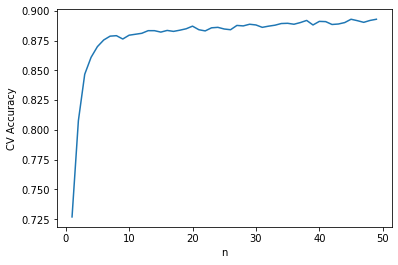

In [167]:
plt.plot(ks, ac)
plt.xlabel('n')
plt.ylabel('CV Accuracy')

n = 50 is the best choice

Lets see if selected features choosen properly

In [100]:
len(selected_features)

50

In [101]:
selected_features

Index(['dd', 'db', 'ent_q_diffs_19', 'ent_q_diffs_median', 'ent_q_diffs_min',
       'ent_q_diff_diffs_0_median', 'ent_q_diff_diffs_1_mean',
       'ent_q_diff_diffs_1_median', 'ent_q_diff_diffs_1_max',
       'ent_q_diff_diffs_1_min', 'ent_q_diff_diffs_2_mean',
       'ent_q_diff_diffs_2_median', 'ent_q_diff_diffs_2_max',
       'ent_q_diff_diffs_2_min', 'ent_q_diff_diffs_2_max-min',
       'ent_q_diff_diffs_3_median', 'ent_q_diff_diffs_3_min', 'ent_p_0',
       'ent_p_1', 'ent_p_2', 'ent_p_3', 'ent_p_4', 'ent_p_5', 'ent_p_6',
       'ent_p_7', 'ent_p_8', 'ent_p_9', 'ent_p_10', 'ent_p_11', 'ent_p_12',
       'ent_p_14', 'ent_p_diffs_0', 'ent_p_diffs_3', 'ent_p_diffs_4',
       'ent_p_diffs_5', 'ent_p_diffs_7', 'ent_p_diffs_8',
       'section_names_.data', 'section_names_.rdata', 'TB_07', 'FileSize',
       'dd_rdata', 'db3_rdata', 'Img17', 'Img43', 'line_count_asm', 'size_asm',
       'ExtendedAscii', 'Img106', 'Img107'],
      dtype='object')


**`Recreating the dataframe with selected features and their target values. For N=50 `**

In [102]:
X = df[selected_features]
y = df["target"]

In [103]:
selected_feature_df = pd.concat([X, y], axis=1)


Dataframe with selected features and target.

In [104]:
selected_feature_df

,dd,db,ent_q_diffs_19,ent_q_diffs_median,ent_q_diffs_min,ent_q_diff_diffs_0_median,ent_q_diff_diffs_1_mean,ent_q_diff_diffs_1_median,ent_q_diff_diffs_1_max,ent_q_diff_diffs_1_min,...,dd_rdata,db3_rdata,Img17,Img43,line_count_asm,size_asm,ExtendedAscii,Img106,Img107,target
0,87450.000000,6.387700e+04,0.007111,3.287587,0.935826,3.343766,3.303931,3.303541,3.340287,5694.699627,...,0.022534,0.929824,0.019339,0.019408,118529.000000,6874624.0,15087.00000,171979.000000,162674.0,2
1,2911.000000,5.817000e+03,0.527049,3.855402,-0.002843,3.724415,3.972226,68333.721912,3.996263,3.920995,...,0.000000,0.000000,0.136843,0.136971,98253.227205,460288.0,579.00000,7702.000000,6551.0,8
2,671.000000,1.367070e+06,0.000000,3.076682,0.214832,3.111649,3.086481,3.086244,3.135941,3.036401,...,0.270903,0.011148,0.077245,0.077628,90625.000000,5256192.0,385051.00000,151324.169975,12946.0,6
3,65917.000000,1.319000e+03,0.002677,3.718103,0.000000,3.741434,3.722709,3.728404,3.762014,3.646042,...,0.156450,0.477585,0.020483,43831.635751,83201.000000,4825600.0,138.00000,122247.000000,98621.0,4
4,106.000000,1.390000e+02,0.392382,3.729796,0.488767,3.685106,3.600971,3.643115,3.742570,2.733127,...,0.287926,0.191950,0.073053,0.072308,12289.000000,712704.0,46020.42304,15501.000000,11864.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,145.000000,8.081200e+04,0.526386,3.890063,-0.003979,3.925258,3.997170,3.997181,3.998172,3.995805,...,0.000000,0.956830,0.432878,0.433107,9729.000000,564224.0,38809.00000,7100.000000,6002.0,4
4995,171.000000,1.625000e+03,0.250124,-0.021744,-0.066759,-0.011146,-0.033653,-0.033653,-0.022400,-0.044906,...,0.098437,0.696875,0.743118,0.743086,252838.342877,11329024.0,136.00000,69304.000000,65638.0,3
4996,176.000000,3.357940e+04,0.345338,91553.848334,-0.066875,3.989448,1.626240,-0.025468,4.061918,-0.033914,...,0.286364,0.109091,0.636657,0.636735,146689.000000,8507904.0,0.00000,71789.000000,68354.0,3
4997,17722.117177,9.175662e+05,0.005243,3.525569,-0.068154,3.560385,3.537350,3.538891,3.572166,3.469215,...,0.000638,0.995316,0.191754,0.191604,76608.000000,4443250.0,265184.00000,89989.000000,70139.0,2


# Classification

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

**`Applying GridSearch to Random Forest Classifier : Accuracy: 0.896 `**

Accuracy was 0.891 before appliyng K-fold.

Always split the data into train and test set

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Define model

In [107]:
rfc = RandomForestClassifier()

Define the hyperparameter grid


In [108]:
param_grid = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': np.arange(1, 20),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10)}

Perform k-fold cross validation


In [109]:
kf = KFold(n_splits=5, shuffle=True, random_state=55)
accuracies = []
best_params = []

I added a for loop to iterate over the splits defined by the KFold and perform the random search, evaluation and store the best hyperparameters on each fold.

 accuracies is a list to store the accuracy of each fold and the best hyperparameters of each fold and printed the mean accuracy and the best hyperparameters for each fold at the end of the loop.

Perform randomized search

In [110]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    random_search = RandomizedSearchCV(rfc, param_grid, cv=5, n_iter=25, random_state=42,)
    random_search.fit(X_train, y_train)
    y_pred = random_search.predict(X_test)# evaluate the model on test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    best_params.append(random_search.best_params_)

In [111]:
print(f'Mean Accuracy: {np.mean(accuracies):.3f}')
#best parameters for each fold
print(best_params)

Mean Accuracy: 0.895
[{'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 17}, {'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 17}, {'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 17}, {'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 17}, {'n_estimators': 180, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 17}]


**`Applying GridSearch with Decision Tree:Accuracy: 0.842 `**

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

Split the data into training and testing sets


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [121]:
# Define the decision tree classifier
dt = DecisionTreeClassifier()

# Define the parameter grid to search over
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=4)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

To find the best hyperparameters:

In [122]:
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


We have to re-initialize the decision tree classifier with the best_params above

In [123]:
dt = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                            min_samples_leaf=best_params['min_samples_leaf'],
                            min_samples_split=best_params['min_samples_split'])

Fit the classifier to the complete dataset.The grid search is then performed on the training data to find the best hyperparameters.


In [124]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [125]:
y_pred = dt.predict(X_test)

In [126]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report: {classification_report(y_test, y_pred)}')

Accuracy: 0.845
Classification Report:               precision    recall  f1-score   support

           1       0.78      0.82      0.80       142
           2       0.86      0.95      0.90       206
           3       0.93      0.97      0.95       273
           4       0.82      0.67      0.74        46
           5       0.00      0.00      0.00        15
           6       0.71      0.72      0.71        64
           7       0.82      0.64      0.72        36
           8       0.78      0.72      0.75       125
           9       0.88      0.86      0.87        93

    accuracy                           0.84      1000
   macro avg       0.73      0.70      0.71      1000
weighted avg       0.83      0.84      0.84      1000



**`Applying GridSearch with Naive Bayes Decision:Accuracy: 0.46 `**

In [127]:
from sklearn.naive_bayes import MultinomialNB

In [128]:
#replace negative values with their absolute value
X = np.abs(X)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [130]:
nb = MultinomialNB()

In [131]:
# Define the parameter grid
param_grid = {'alpha': [0.1, 1, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=4)

# Fit the data to the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Predict on the test set
y_pred = grid_search.predict(X_test)

# Print the accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Best parameters: {'alpha': 0.1}
Accuracy: 0.46


# Ensemble

There are several ways to ensemble different models, but I will use voting classifier.

In [132]:
from sklearn.ensemble import VotingClassifier

# Lets Relocate and remind the classifiers.
# rfc = Random Forest
# dt = Decision Tree
# nb = Naive Bayes
# Create a list of the classifiers
classifiers = [('Random Forest', rfc), ('Decision Tree', dt), ('Naive Bayes', nb)]


**`Voting classifier `**


Hard voting. Hard Voting Ensemble model accuracy: 0.862

In [173]:
voting_clf = VotingClassifier(estimators=classifiers, voting='hard')

Fit the voting classifier to the training data


In [174]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=5)),
                             ('Naive Bayes', MultinomialNB())])

Lets make predictions on the test data


In [175]:
y_pred = voting_clf.predict(X_test)

In [183]:
# Calculate the accuracy of the ensemble model on the test data
accuracy = voting_clf.score(X_test, y_test)

# Print the accuracy
print('Hard Voting Ensemble model accuracy: {:.3f}'.format(accuracy))


Hard Voting Ensemble model accuracy: 0.862


Soft voting, same operations. Soft Voting Ensemble model accuracy: 0.861

In [184]:
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')


In [185]:
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                             ('Decision Tree',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=5)),
                             ('Naive Bayes', MultinomialNB())],
                 voting='soft')

In [186]:
y_pred = voting_clf.predict(X_test)

In [187]:
# Calculate the accuracy of the ensemble model on the test data
accuracy = voting_clf.score(X_test, y_test)

# Print the accuracy
print('Soft Voting Ensemble model accuracy: {:.3f}'.format(accuracy))


Soft Voting Ensemble model accuracy: 0.861
